# BNP Paribas.

# Bussines Case Project 2025/2026

Group:V
   - Alano Gonçalves (20250457)
   - Catarina ()
   - João Carichas (20250507)
   - Marta Ribeiro ()
   - Nicole Nogeira()

# Index

- [1. Import](#import)
  - [1.1 Import libraries](#import-libraries)
  - [1.2 Import the dataset](#import-the-dataset)
- [2. Data Exploration](#data-Exploration)
  - [2.1 MetaData](#metadata)
  - [2.2 Analysing the Data](#Analysing-the-Data)
  - [2.3 Data Visualization](#Data-visualization)
  - [2.4 Correlation Check](#correlation-check)
- [3. Data Quality & Feature Engineering](#Data-Quality-&-Feature-Engineering)
  - [3.1 Data Quality](#Data-Quality)
  - [3.2 Feature Engineering](#Feature-Engineering)
- [4. Implications for Clustering](#Implications-for-Clustering)
  

<div class="alert alert-block alert-info">

<a class="anchor" id="1. Import">    </a>
# 1. Import
       
</div>


[Back to Index](#index)

<a class="anchor" id="1.1 Import Libraries">

## 1.1 Import Libraries
    
</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

<a class="anchor" id="1.2 Import the Dataset">

## 1.2 Import the Dataset
    
</a>

In [2]:
!pip install pandas pyarrow
!pip install fastparquet

In [3]:
file_path = r"C:\Users\martr\OneDrive\Documentos\GitHub\crc.parquet"

# Ler o ficheiro parquet
CRC = pd.read_parquet(file_path, engine="fastparquet")

In [4]:
file_path1 = r"C:\Users\martr\OneDrive\Documentos\GitHub\BNP-Paribas\credscore.parquet"
CREDSCORE = pd.read_parquet(file_path1, engine="fastparquet")


In [5]:
file_path2 = r"C:\Users\martr\OneDrive\Documentos\GitHub\BNP-Paribas\fama.parquet"
FAMA = pd.read_parquet(file_path2, engine="fastparquet")

In [6]:
file_path = r"C:\Users\martr\OneDrive\Documentos\GitHub\BDOSS.parquet"

# Ler o ficheiro parquet
BDOSS = pd.read_parquet(file_path, engine="fastparquet")

<div class="alert alert-block alert-info">

<a class="anchor" id="2. Data Exploration">    </a>
# 2. Data Exploration
       
</div>


[Back to Index](#index)

<a class="anchor" id="2.1 MetaData">

## 2.1 MetaData

<a class="anchor" id="2.2 Analysing the Data">

## 2.2 Analysing the Data
    
</a>

<a class="anchor" id="2.2.1 CRC">

## 2.2.1 CRC
    
</a>

 Metadata
- *Date_Obs*: Observation Date (MMYY).
- *MT_MENSAL*: Sum of monthly installments paid by the client.
- *COUNT_CL*: Consumer credit count.
- *COUNT_CP*: Credit card or revolving credit count.
- *COUNT_AUTO*:  Auto loan credit count.
- *COUNT_HT*: Mortgage credit count.
- *COUNT_CONEXO*: Connected credit count.
- *COUNT_OTHER*: Other credits count.
- *COUNT_TOTAL*: Total credits count.
- *MONTVENC_CL*:  Sum of overdue amounts in consumer credit. 
- *MONTVENC_CP*:  Sum of overdue amounts in credit card and revolving credit.
- *MONTVENC_AUTO*:  Sum of overdue amounts in auto loans.
- *MONTVENC_HT*:  Sum of overdue amounts in mortgages.
- *MONTABATV_CL*:  Sum of written-off amounts in consumer credit.
- *MONTABATV_CP*:  Sum of written-off amounts in credit card and revolving credit.
- *MONTABATV_AUTO*:  Sum of written-off amounts in auto loans.
- *MONTABATV_HT*:  Sum of written-off amounts in mortgages.
- *DIVIDAS_CL*:   Total consumer credit debt.
- *DIVIDAS_CP*:  Total credit card and revolving credit debt.
- *DIVIDAS_AUTO*: Total auto loan debt.
- *DIVIDAS_HT*: Total mortgage debt.

Information from Portuguese Central Bank on customers

In [7]:
CRC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034921 entries, 0 to 3034920
Data columns (total 22 columns):
 #   Column          Dtype         
---  ------          -----         
 0   CONTRIB         object        
 1   OBS_DATE        datetime64[ns]
 2   MT_MENSAL       float64       
 3   COUNT_CL        float64       
 4   COUNT_CP        float64       
 5   COUNT_AUTO      float64       
 6   COUNT_HT        float64       
 7   COUNT_CONEXO    float64       
 8   COUNT_OTHER     float64       
 9   COUNT_TOTAL     float64       
 10  MONTVENC_CL     float64       
 11  MONTVENC_CP     float64       
 12  MONTVENC_AUTO   float64       
 13  MONTVENC_HT     float64       
 14  MONTABATV_CL    float64       
 15  MONTABATV_CP    float64       
 16  MONTABATV_AUTO  float64       
 17  MONTABATV_HT    float64       
 18  DIVIDAS_CL      float64       
 19  DIVIDAS_CP      float64       
 20  DIVIDAS_AUTO    float64       
 21  DIVIDAS_HT      float64       
dtypes: datetime64[ns](

- The most important (serious ones) are the MONTABATV. If those variables are too high, the client is not trustworthy.
- It is normal for a client to have DIVIDAS, but is preferable if they reduce month to month.

In [8]:
CRC['COUNT_CL'] = CRC['COUNT_CL'].round().astype('Int32')
CRC['COUNT_CP'] = CRC['COUNT_CP'].round().astype('Int32')
CRC['COUNT_AUTO'] = CRC['COUNT_AUTO'].round().astype('Int32')
CRC['COUNT_HT'] = CRC['COUNT_HT'].round().astype('Int32')
CRC['COUNT_CONEXO'] = CRC['COUNT_CONEXO'].round().astype('Int32')
CRC['COUNT_OTHER'] = CRC['COUNT_OTHER'].round().astype('Int32')
CRC['COUNT_TOTAL'] = CRC['COUNT_TOTAL'].round().astype('Int32')

In [9]:
CRC.describe().round(2)

,OBS_DATE,MT_MENSAL,COUNT_CL,COUNT_CP,COUNT_AUTO,COUNT_HT,COUNT_CONEXO,COUNT_OTHER,COUNT_TOTAL,MONTVENC_CL,...,MONTVENC_AUTO,MONTVENC_HT,MONTABATV_CL,MONTABATV_CP,MONTABATV_AUTO,MONTABATV_HT,DIVIDAS_CL,DIVIDAS_CP,DIVIDAS_AUTO,DIVIDAS_HT
count,3034921,1029718.00,3034749.0,3034749.0,3034749.0,3034749.0,3034749.0,3034749.0,3034749.0,3034749.00,...,3034749.00,3034749.00,3034749.00,3034749.00,3034749.00,3034749.00,3034749.00,3034749.00,3034749.00,3034749.00
mean,2025-01-01 06:09:42.119141376,552.09,1.65,3.09,0.55,0.46,0.07,0.67,6.49,103.33,...,19.69,37.85,4.34,4.27,0.30,0.47,11438.98,2624.60,5403.67,30449.71
min,2023-12-31 00:00:00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2024-06-30 00:00:00,236.67,1.0,2.0,0.0,0.0,0.0,0.0,4.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1128.30,132.84,0.00,0.00
50%,2024-12-31 00:00:00,446.60,1.0,3.0,0.0,0.0,0.0,0.0,6.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,6160.02,1133.66,0.00,0.00
75%,2025-06-30 00:00:00,724.99,2.0,4.0,1.0,1.0,0.0,1.0,8.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,15248.11,3219.76,8243.23,46515.51
max,2025-12-31 00:00:00,1224049.39,90.0,183.0,26.0,36.0,15.0,72.0,330.0,2923893.44,...,130756.11,807322.92,171424.67,62861.30,33127.84,288803.22,3194523.32,480181.93,514850.48,4582324.44
std,NaN,1736.58,1.65,2.41,0.76,0.73,0.3,0.88,4.07,2818.38,...,591.92,2541.25,285.17,209.89,59.54,211.27,17905.50,4414.23,9711.06,59607.22


In [10]:
#checking number of duplicates
CRC.duplicated().sum()

np.int64(0)

In [11]:
#checking number of missing values
CRC.isna().sum()

CONTRIB                 0
OBS_DATE                0
MT_MENSAL         2005203
COUNT_CL              172
COUNT_CP              172
COUNT_AUTO            172
COUNT_HT              172
COUNT_CONEXO          172
COUNT_OTHER           172
COUNT_TOTAL           172
MONTVENC_CL           172
MONTVENC_CP           172
MONTVENC_AUTO         172
MONTVENC_HT           172
MONTABATV_CL          172
MONTABATV_CP          172
MONTABATV_AUTO        172
MONTABATV_HT          172
DIVIDAS_CL            172
DIVIDAS_CP            172
DIVIDAS_AUTO          172
DIVIDAS_HT            172
dtype: int64

In [15]:
#checking umber of missing values in each column as a percentage
CRC.isna().sum()/len(CRC) * 100

CONTRIB            0.000000
OBS_DATE           0.000000
MT_MENSAL         66.071011
COUNT_CL           0.005667
COUNT_CP           0.005667
COUNT_AUTO         0.005667
COUNT_HT           0.005667
COUNT_CONEXO       0.005667
COUNT_OTHER        0.005667
COUNT_TOTAL        0.005667
MONTVENC_CL        0.005667
MONTVENC_CP        0.005667
MONTVENC_AUTO      0.005667
MONTVENC_HT        0.005667
MONTABATV_CL       0.005667
MONTABATV_CP       0.005667
MONTABATV_AUTO     0.005667
MONTABATV_HT       0.005667
DIVIDAS_CL         0.005667
DIVIDAS_CP         0.005667
DIVIDAS_AUTO       0.005667
DIVIDAS_HT         0.005667
dtype: float64

- MT_MENSAL tem bastantes missing values- provavelmente não é uma variavel que nos vá dar muita informação (mais de 66% é missing value)
- Todas as outras variaveis têm o mesmo numero de missing values que provavelmente pretence às mesmas linhas: pode ser removido

In [12]:
CRC[CRC['COUNT_CL'].isna()]

,CONTRIB,OBS_DATE,MT_MENSAL,COUNT_CL,COUNT_CP,COUNT_AUTO,COUNT_HT,COUNT_CONEXO,COUNT_OTHER,COUNT_TOTAL,...,MONTVENC_AUTO,MONTVENC_HT,MONTABATV_CL,MONTABATV_CP,MONTABATV_AUTO,MONTABATV_HT,DIVIDAS_CL,DIVIDAS_CP,DIVIDAS_AUTO,DIVIDAS_HT
16677,246028aa732dccdcbb4a59d0de5bf2195154a87c93349f...,2023-12-31,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36377,4e8dd38f4bf02f0ec56a3901a8bb0890f54bd6bd92a67b...,2023-12-31,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75904,a3aecd3b649fce86a1337dcb3f23a1dfa03a21dae0a46f...,2023-12-31,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81305,af6c29c28d7de808d1f86e00b6a279ed9c5cc3119dc8c0...,2023-12-31,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87441,bc6a1a24545459c49741c0a3e21a7f0707b59a008902c2...,2023-12-31,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764798,c7e93bc661a9d5329ea48d365935197aecff39161303b6...,2025-10-31,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2881432,bc6a1a24545459c49741c0a3e21a7f0707b59a008902c2...,2025-11-30,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2886934,c7e93bc661a9d5329ea48d365935197aecff39161303b6...,2025-11-30,394.8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3002785,bc6a1a24545459c49741c0a3e21a7f0707b59a008902c2...,2025-12-31,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
CRC[CRC['COUNT_CP'].isna()]

,CONTRIB,OBS_DATE,MT_MENSAL,COUNT_CL,COUNT_CP,COUNT_AUTO,COUNT_HT,COUNT_CONEXO,COUNT_OTHER,COUNT_TOTAL,...,MONTVENC_AUTO,MONTVENC_HT,MONTABATV_CL,MONTABATV_CP,MONTABATV_AUTO,MONTABATV_HT,DIVIDAS_CL,DIVIDAS_CP,DIVIDAS_AUTO,DIVIDAS_HT
16677,246028aa732dccdcbb4a59d0de5bf2195154a87c93349f...,2023-12-31,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36377,4e8dd38f4bf02f0ec56a3901a8bb0890f54bd6bd92a67b...,2023-12-31,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75904,a3aecd3b649fce86a1337dcb3f23a1dfa03a21dae0a46f...,2023-12-31,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81305,af6c29c28d7de808d1f86e00b6a279ed9c5cc3119dc8c0...,2023-12-31,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87441,bc6a1a24545459c49741c0a3e21a7f0707b59a008902c2...,2023-12-31,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764798,c7e93bc661a9d5329ea48d365935197aecff39161303b6...,2025-10-31,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2881432,bc6a1a24545459c49741c0a3e21a7f0707b59a008902c2...,2025-11-30,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2886934,c7e93bc661a9d5329ea48d365935197aecff39161303b6...,2025-11-30,394.8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3002785,bc6a1a24545459c49741c0a3e21a7f0707b59a008902c2...,2025-12-31,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
CRC[CRC['CONTRIB'] == 'c7e93bc661a9d5329ea48d365935197aecff39161303b6bf625189371f7ac23c']

,CONTRIB,OBS_DATE,MT_MENSAL,COUNT_CL,COUNT_CP,COUNT_AUTO,COUNT_HT,COUNT_CONEXO,COUNT_OTHER,COUNT_TOTAL,...,MONTVENC_AUTO,MONTVENC_HT,MONTABATV_CL,MONTABATV_CP,MONTABATV_AUTO,MONTABATV_HT,DIVIDAS_CL,DIVIDAS_CP,DIVIDAS_AUTO,DIVIDAS_HT
92851,c7e93bc661a9d5329ea48d365935197aecff39161303b6...,2023-12-31,0.00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212165,c7e93bc661a9d5329ea48d365935197aecff39161303b6...,2024-01-31,0.00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331418,c7e93bc661a9d5329ea48d365935197aecff39161303b6...,2024-02-29,0.00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450836,c7e93bc661a9d5329ea48d365935197aecff39161303b6...,2024-03-31,0.00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570663,c7e93bc661a9d5329ea48d365935197aecff39161303b6...,2024-04-30,0.00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690551,c7e93bc661a9d5329ea48d365935197aecff39161303b6...,2024-05-31,0.00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810839,c7e93bc661a9d5329ea48d365935197aecff39161303b6...,2024-06-30,0.00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
931242,c7e93bc661a9d5329ea48d365935197aecff39161303b6...,2024-07-31,0.00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1051645,c7e93bc661a9d5329ea48d365935197aecff39161303b6...,2024-08-31,0.00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1172696,c7e93bc661a9d5329ea48d365935197aecff39161303b6...,2024-09-30,431.03,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
CRC.tail()

,CONTRIB,OBS_DATE,MT_MENSAL,COUNT_CL,COUNT_CP,COUNT_AUTO,COUNT_HT,COUNT_CONEXO,COUNT_OTHER,COUNT_TOTAL,...,MONTVENC_AUTO,MONTVENC_HT,MONTABATV_CL,MONTABATV_CP,MONTABATV_AUTO,MONTABATV_HT,DIVIDAS_CL,DIVIDAS_CP,DIVIDAS_AUTO,DIVIDAS_HT
3034916,fffc5ec9541c7691c7759c637317530910cf44783e4209...,2025-12-31,NaN,3,4,1,1,0,2,11,...,0.0,0.0,0.0,0.0,0.0,0.0,11944.76,3285.33,2975.66,76534.61
3034917,fffc6e5b2f4865ed2d2c6c8724f9c4c340e47d2b052bc6...,2025-12-31,990.24,3,4,0,0,0,1,8,...,0.0,0.0,0.0,0.0,0.0,0.0,50534.29,1959.59,0.00,0.00
3034918,fffc991d73df732084dab58938d520b8a5d8712474fa53...,2025-12-31,NaN,0,2,0,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
3034919,fffd54b6dbb4cc001fb8ab52a905cff9bdbf14b747be9a...,2025-12-31,NaN,1,1,1,0,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,2197.85,2213.10,18037.03,0.00
3034920,fffe8c5cbb44ad3ec6154ef5a5208ecd76594a88377f00...,2025-12-31,NaN,3,1,0,0,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,20193.99,3057.11,0.00,0.00


In [18]:
CRC = CRC.sort_values(['CONTRIB', 'OBS_DATE'])

In [ ]:
#To each client, check the maximum and minimum number of each variable
CRC.groupby('CONTRIB').agg(['min', 'max'])

OBS_DATE             \
                                                          min        max   
CONTRIB                                                                    
00008246f87bcc3c17b90629bb183fe2e58795176310f01... 2023-12-31 2025-12-31   
0000ab2116257783438c70ff85a3e98f2d4194ebe534349... 2023-12-31 2025-12-31   
0000f858346061c53064586a3347b34659565a6712d004e... 2023-12-31 2025-12-31   
00025459b703e1c308553e83a6d545a71fe6a787c2dd1c6... 2023-12-31 2025-12-31   
00041ebafb1270a818c30cb1fb20d3699002196644ea8fd... 2023-12-31 2025-11-30   
...                                                       ...        ...   
fffc6e5b2f4865ed2d2c6c8724f9c4c340e47d2b052bc67... 2023-12-31 2025-12-31   
fffc991d73df732084dab58938d520b8a5d8712474fa539... 2023-12-31 2025-12-31   
fffd54b6dbb4cc001fb8ab52a905cff9bdbf14b747be9a9... 2023-12-31 2025-12-31   
fffe8c5cbb44ad3ec6154ef5a5208ecd76594a88377f00c... 2023-12-31 2025-12-31   
ffff943c736f98d4840f65328ba372a29689312dd781b43... 2023-12-31 2025-08-31   

                                                   MT_MENSAL           \
                                                         min      max   
CONTRIB                                                                 
00008246f87bcc3c17b90629bb183fe2e58795176310f01...       NaN      NaN   
0000ab2116257783438c70ff85a3e98f2d4194ebe534349...    538.67   547.45   
0000f858346061c53064586a3347b34659565a6712d004e...       NaN      NaN   
00025459b703e1c308553e83a6d545a71fe6a787c2dd1c6...    515.57   515.57   
00041ebafb1270a818c30cb1fb20d3699002196644ea8fd...       NaN      NaN   
...                                                      ...      ...   
fffc6e5b2f4865ed2d2c6c8724f9c4c340e47d2b052bc67...    305.96  1031.51   
fffc991d73df732084dab58938d520b8a5d8712474fa539...       NaN      NaN   
fffd54b6dbb4cc001fb8ab52a905cff9bdbf14b747be9a9...       NaN      NaN   
fffe8c5cbb44ad3ec6154ef5a5208ecd76594a88377f00c...       NaN      NaN   
ffff943c736f98d4840f65328ba372a29689312dd781b43...       NaN      NaN   

                                                   COUNT_CL     COUNT_CP      \
                                                        min max      min max   
CONTRIB                                                                        
00008246f87bcc3c17b90629bb183fe2e58795176310f01...        0   1        3   9   
0000ab2116257783438c70ff85a3e98f2d4194ebe534349...        4  12        5  15   
0000f858346061c53064586a3347b34659565a6712d004e...        1   2        5  10   
00025459b703e1c308553e83a6d545a71fe6a787c2dd1c6...        3   3        1   2   
00041ebafb1270a818c30cb1fb20d3699002196644ea8fd...        8  36        3  16   
...                                                     ...  ..      ...  ..   
fffc6e5b2f4865ed2d2c6c8724f9c4c340e47d2b052bc67...        1   3        2   8   
fffc991d73df732084dab58938d520b8a5d8712474fa539...        0   1        2   2   
fffd54b6dbb4cc001fb8ab52a905cff9bdbf14b747be9a9...        1   1        1   1   
fffe8c5cbb44ad3ec6154ef5a5208ecd76594a88377f00c...        2   3        1   2   
ffff943c736f98d4840f65328ba372a29689312dd781b43...        0   1        3   5   

                                                   COUNT_AUTO      ...  \
                                                          min max  ...   
CONTRIB                                                            ...   
00008246f87bcc3c17b90629bb183fe2e58795176310f01...          0   6  ...   
0000ab2116257783438c70ff85a3e98f2d4194ebe534349...          0   0  ...   
0000f858346061c53064586a3347b34659565a6712d004e...          1   2  ...   
00025459b703e1c308553e83a6d545a71fe6a787c2dd1c6...          0   0  ...   
00041ebafb1270a818c30cb1fb20d3699002196644ea8fd...          0   0  ...   
...                                                       ...  ..  ...   
fffc6e5b2f4865ed2d2c6c8724f9c4c340e47d2b052bc67...          0   1  ...   
fffc991d73df732084dab58938d520b8a5d8712474fa539...          0   0  ...   
fffd54b6dbb4cc001fb8ab52a905cf

In [21]:
CRC.head(26)

,CONTRIB,OBS_DATE,MT_MENSAL,COUNT_CL,COUNT_CP,COUNT_AUTO,COUNT_HT,COUNT_CONEXO,COUNT_OTHER,COUNT_TOTAL,...,MONTVENC_AUTO,MONTVENC_HT,MONTABATV_CL,MONTABATV_CP,MONTABATV_AUTO,MONTABATV_HT,DIVIDAS_CL,DIVIDAS_CP,DIVIDAS_AUTO,DIVIDAS_HT
0,00008246f87bcc3c17b90629bb183fe2e58795176310f0...,2023-12-31,NaN,1,4,0,0,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,6842.10,963.55,0.00,0.0
119091,00008246f87bcc3c17b90629bb183fe2e58795176310f0...,2024-01-31,NaN,1,4,0,0,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,6782.21,2111.44,0.00,0.0
238477,00008246f87bcc3c17b90629bb183fe2e58795176310f0...,2024-02-29,NaN,1,4,0,0,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,6721.85,312.81,0.00,0.0
357730,00008246f87bcc3c17b90629bb183fe2e58795176310f0...,2024-03-31,NaN,1,4,0,0,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,6661.02,501.34,0.00,0.0
477210,00008246f87bcc3c17b90629bb183fe2e58795176310f0...,2024-04-30,NaN,1,4,0,0,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,6599.72,997.36,0.00,0.0
597135,00008246f87bcc3c17b90629bb183fe2e58795176310f0...,2024-05-31,NaN,1,4,0,0,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,6537.94,1067.19,0.00,0.0
717015,00008246f87bcc3c17b90629bb183fe2e58795176310f0...,2024-06-30,NaN,1,4,0,0,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,8000.00,1729.30,0.00,0.0
837418,00008246f87bcc3c17b90629bb183fe2e58795176310f0...,2024-07-31,NaN,1,4,0,0,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,8000.00,1729.30,0.00,0.0
957821,00008246f87bcc3c17b90629bb183fe2e58795176310f0...,2024-08-31,NaN,1,4,0,0,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,8000.00,1729.30,0.00,0.0
1078224,00008246f87bcc3c17b90629bb183fe2e58795176310f0...,2024-09-30,NaN,0,4,1,0,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.65,16000.00,0.0


In [ ]:
#how many months of data do we have per client
CRC['CONTRIB'].value_counts()

CONTRIB
000785e8aca11cecd0db680ef13a751aa97ccf322d033332c0a4aff8db6e868c    25
fffe8c5cbb44ad3ec6154ef5a5208ecd76594a88377f00c5ce4e07c92bfe1f3b    25
00008246f87bcc3c17b90629bb183fe2e58795176310f017217d7749af7ee981    25
0000ab2116257783438c70ff85a3e98f2d4194ebe534349a33373dfcb3a3a297    25
0000f858346061c53064586a3347b34659565a6712d004e64309c2473f76faed    25
                                                                    ..
9e8f09117f4ea75b219984761fbdf795ba8e49e669e3d8168f8130bd84bb1b08     1
9e997a7ba95af15492c406601b2973edadd506930affa825ea884cd8d066133a     1
9eaa8e8ad04d65875075ac51063d9e38f2d599fc08d8b6de1e9d802f28281549     1
9ea65350fcbfd95566703782a8e95043445e996aa9e550783c87c25c69d3ad14     1
76859523ebb3d71fa7a5aeb17a43970d0dde5a3800099131d24df5913bd660d3     1
Name: count, Length: 141663, dtype: int64

There are clients that do not have information about the all 25 months

In [ ]:
#creating 'MONTVENC_TOTAL'
CRC['MONTVENC_TOTAL'] = CRC[
    ['MONTVENC_CL','MONTVENC_CP','MONTVENC_AUTO','MONTVENC_HT']
].sum(axis=1)

In [ ]:
#creating 'MONTABATV_TOTAL'
CRC['MONTABATV_TOTAL'] = CRC[
    ['MONTABATV_CL','MONTABATV_CP','MONTABATV_AUTO','MONTABATV_HT']
].sum(axis=1)

In [28]:
#creating 'DIVIDAS_TOTAL'
CRC['DIVIDAS_TOTAL'] = CRC[
    ['DIVIDAS_CL','DIVIDAS_CP','DIVIDAS_AUTO','DIVIDAS_HT']
].sum(axis=1)

In [29]:
#is the client late in his payment?
CRC['HAS_OVERDUE'] = (CRC['MONTVENC_TOTAL'] > 0).astype(int)

In [30]:
#has the client default history?
CRC['HAS_DEFAULT_HISTORY'] = (CRC['MONTABATV_TOTAL'] > 0).astype(int)

In [ ]:
#How severe is the delay compared to total debt?
CRC['OVERDUE_RATIO'] = CRC['MONTVENC_TOTAL'] / (CRC['DIVIDAS_TOTAL'] + 1)

In [ ]:
#How heavy is debt compared to monthly payments?
CRC['DEBT_TO_PAYMENT'] = CRC['DIVIDAS_TOTAL'] / (CRC['MT_MENSAL'] + 1)

In [ ]:
#setting index to CONTRIB
#CRC.set_index('CONTRIB', inplace = True)

In [ ]:
numeric_cols = ['COUNT_CL', 'COUNT_CP', 'COUNT_AUTO', 'COUNT_HT', 'COUNT_CONEXO', 'COUNT_OTHER', 'COUNT_TOTAL', 'MONTVENC_CL', 'MONTVENC_CP', 'MONTVENC_AUTO', 'MONTVENC_HT', 
                'MONTABATV_CL', 'MONTABATV_CP', 'MONTABATV_AUTO', 'MONTABATV_HT', 'DIVIDAS_CL', 'DIVIDAS_CP', 'DIVIDAS_AUTO', 'DIVIDAS_HT']

N = 200_000 
sample = CRC.sample(n=min(N, len(CRC)), random_state=42) 
cols = numeric_cols[:6] 

fig, axes = plt.subplots(2, 3, figsize=(14, 8)) 
axes = axes.ravel() 
for ax, col in zip(axes, cols): 
    sns.histplot(sample[col].dropna(), bins=60, kde=False, ax=ax) 
    ax.set_title(col) 

plt.tight_layout() 
plt.show()

In [ ]:
N = 200_000 
sample = CRC.sample(n=min(N, len(CRC)), random_state=42) 
cols = numeric_cols[7:13] 

fig, axes = plt.subplots(2, 3, figsize=(14, 8)) 
axes = axes.ravel() 
for ax, col in zip(axes, cols): 
    sns.histplot(sample[col].dropna(), bins=60, kde=False, ax=ax) 
    ax.set_title(col) 

plt.tight_layout() 
plt.show()

In [ ]:
N = 200_000 
sample = CRC.sample(n=min(N, len(CRC)), random_state=42) 
cols = numeric_cols[14:20] 

fig, axes = plt.subplots(2, 3, figsize=(14, 8)) 
axes = axes.ravel() 
for ax, col in zip(axes, cols): 
   sns.histplot(sample[col].dropna(), bins=60, kde=False, ax=ax) 
   ax.set_title(col) 

plt.tight_layout() 
plt.show()

In [ ]:
corr = CRC.corr(numeric_only=True)

mask = (corr.abs() < 0.5)

plt.figure(figsize=(12,8))
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            cmap="Blues", 
            center=0)

plt.title("Correlation")
plt.show()

<a class="anchor" id="2.2.2 CREDSCORE">

## 2.2.2 CREDSCORE
    
</a>

 Metadata
- *sys_numero_submissao*: Submission number. 
- *sys_data_procura*: Date of risk probing.
- *kp_sqe*: Risk score of known customers based on behavior: A-X, A is better, null= unknown.
- *ks_score_tier*: risk score for granting (all customers) lower is better.

In [32]:
CREDSCORE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63704 entries, 0 to 63703
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CONTRIB               63704 non-null  object        
 1   sys_numero_submissao  63704 non-null  float64       
 2   sys_data_procura      63704 non-null  datetime64[ns]
 3   kp_sqe                45653 non-null  object        
 4   ks_score_tier         63704 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.4+ MB


In [34]:
CREDSCORE.describe()

,sys_numero_submissao,sys_data_procura,ks_score_tier
count,63704.000000,63704,63704.000000
mean,5.862128,2024-08-26 19:30:49.503955968,1.593102
min,0.000000,2020-08-12 00:00:00,1.000000
25%,3.000000,2023-12-07 00:00:00,1.000000
50%,5.000000,2024-10-10 00:00:00,1.000000
75%,8.000000,2025-06-05 00:00:00,2.000000
max,62.000000,2025-12-15 00:00:00,5.000000
std,4.188669,NaN,0.840196


- The oldest observation we have is from 2020, which can be a litle outdated. 

In [42]:
#descriptive statistics for categorical data
CREDSCORE.describe(include = ['O'])

,CONTRIB,kp_sqe
count,62873,44944
unique,62173,15
top,0327b5a9a23ce7ae7b9256d3d823ad083b8f499400d8b9...,A
freq,19,6933


In [ ]:
#how many clients exists for each classification (Alphabetical order)
CREDSCORE['kp_sqe'] \
    .value_counts(dropna=False) \
    .sort_index()

kp_sqe
A        6933
B        5365
C        4163
D        4581
E        6237
F        6027
G        3334
H        4686
I        1432
J         617
K         451
M         148
U         543
V         123
W         304
None    17929
Name: count, dtype: int64

- We can see the most common classification is 'A' which is a good indicator, and there is no client with classification 'X' (the worst)
- We should see what classification is considered risky

In [49]:
CREDSCORE['ks_score_tier'].value_counts(dropna=False)

ks_score_tier
1.0    38798
2.0    12546
3.0    10673
4.0      579
5.0      277
Name: count, dtype: int64

- The most common one is 1, which is also a good indicator.

In [ ]:
#creating is_risky 
CREDSCORE['is_risky'] = (
    (CREDSCORE['kp_sqe'] > 'D') |
    (CREDSCORE['ks_score_tier'] > 2)
)

In [52]:
CREDSCORE['is_risky'].value_counts(dropna=False)

is_risky
False    32378
True     30495
Name: count, dtype: int64

In [51]:
CREDSCORE.head()

,CONTRIB,sys_numero_submissao,sys_data_procura,kp_sqe,ks_score_tier,is_risky
0,00008246f87bcc3c17b90629bb183fe2e58795176310f0...,22.0,2025-02-05,H,2.0,True
1,0000ab2116257783438c70ff85a3e98f2d4194ebe53434...,4.0,2025-04-09,D,1.0,False
2,00041ebafb1270a818c30cb1fb20d3699002196644ea8f...,1.0,2023-08-08,F,3.0,True
3,00050fe9f0e69ce221a574af0baaff0b37c598af7a5cc6...,4.0,2023-09-11,A,1.0,False
4,0005f134494d2ab97ed5d4164994dcde766a3f77cdb3a9...,15.0,2025-08-14,H,1.0,True


In [35]:
#checking number of duplicates
CREDSCORE.duplicated().sum()

np.int64(831)

In [36]:
#droping duplicate rows 
CREDSCORE = CREDSCORE.drop_duplicates()

In [38]:
#checking number of missing values
CREDSCORE.isna().sum()

CONTRIB                     0
sys_numero_submissao        0
sys_data_procura            0
kp_sqe                  17929
ks_score_tier               0
dtype: int64

In [41]:
#checking umber of missing values in each column as a percentage
CREDSCORE.isna().sum()/len(CREDSCORE) * 100

CONTRIB                  0.000000
sys_numero_submissao     0.000000
sys_data_procura         0.000000
kp_sqe                  28.516215
ks_score_tier            0.000000
dtype: float64

- kp_sqe is the most important variable and 28% of the observations are missing values.

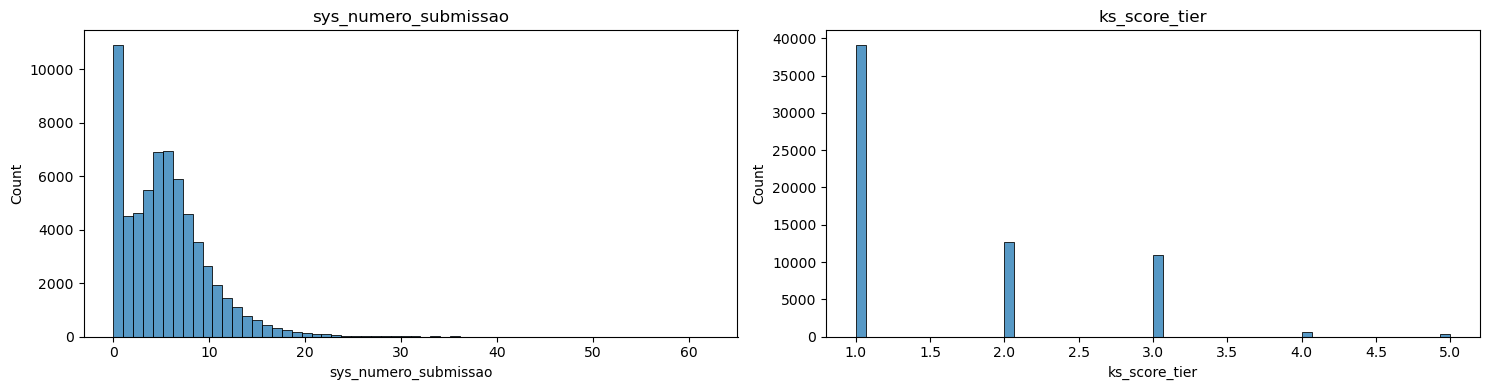

In [33]:
numeric_cols_1 = ["sys_numero_submissao","ks_score_tier"]

fig, axes = plt.subplots(1, len(numeric_cols_1), figsize=(15, 4))
axes = axes.ravel()

for ax, col in zip(axes, numeric_cols_1):
    sns.histplot(CREDSCORE[col].dropna(), bins=60, kde=False, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

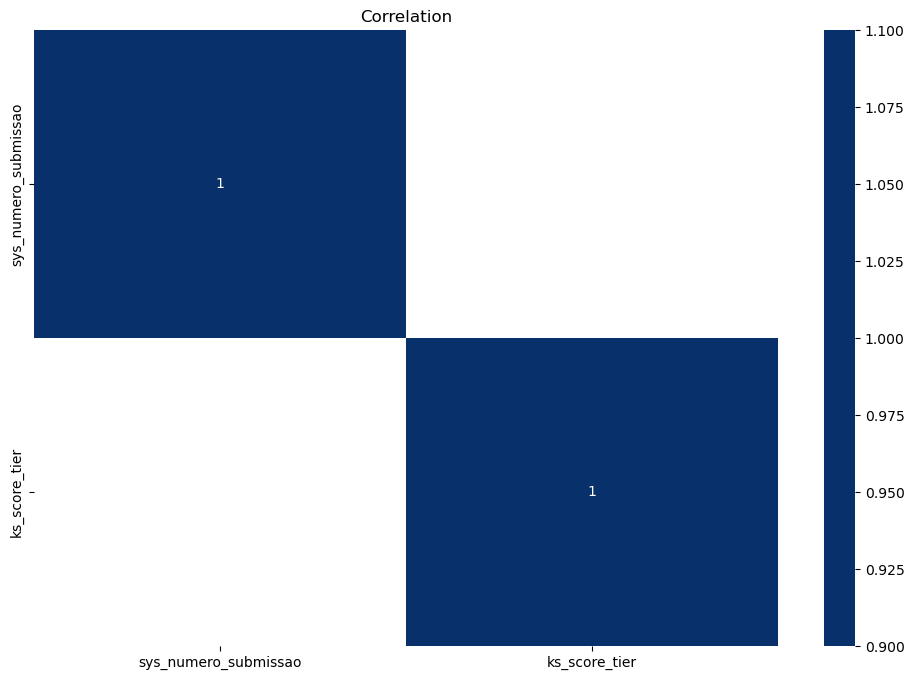

In [47]:
corr = CREDSCORE.corr(numeric_only=True)

mask = (corr.abs() < 0.5)

plt.figure(figsize=(12,8))
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            cmap="Blues", 
            center=0)

plt.title("Correlation")
plt.show()

<a class="anchor" id="2.2.3 FAMA">

## 2.2.3 FAMA
    
</a>

In [53]:
FAMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141115 entries, 0 to 141114
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   CONTRIB                     141115 non-null  object        
 1   Date_Obs                    141115 non-null  datetime64[ms]
 2   ALLBD_N_Dossiers__N         141115 non-null  float64       
 3   ALLBD_N_CL__N               141115 non-null  float64       
 4   ALLBD_N_CP__N               141115 non-null  float64       
 5   ALLBD_A_CL__N               141115 non-null  float64       
 6   ALLBD_A_CP__N               141115 non-null  float64       
 7   ALLBD_MTFINO_CL__N          141115 non-null  float64       
 8   ALLBD_MTFINO_CP__N          141115 non-null  float64       
 9   ALLBD_MTFIN_CL__N           141115 non-null  float64       
 10  ALLBD_MTFIN_CP__N           141115 non-null  float64       
 11  ALLBD_IDADE_MSA__N          141115 non-

- The variable Date_obs is irrelevant here because there is only one date

In [ ]:
FAMA['ALLBD_N_Dossiers__N'] = FAMA['ALLBD_N_Dossiers__N'].round().astype('Int32')
FAMA['ALLBD_N_CL__N'] = FAMA['ALLBD_N_CL__N'].round().astype('Int32')
FAMA['ALLBD_N_CP__N'] = FAMA['ALLBD_N_CP__N'].round().astype('Int32')
FAMA['ALLBD_A_CL__N'] = FAMA['ALLBD_A_CL__N'].round().astype('Int32')
FAMA['ALLBD_A_CP__N'] = FAMA['ALLBD_A_CP__N'].round().astype('Int32')
FAMA['ALLBD_IDADE_MSA__N'] = FAMA['ALLBD_IDADE_MSA__N'].round().astype('Int32')
FAMA['ALLBD_IDADE_MIN__N'] = FAMA['ALLBD_IDADE_MIN__N'].round().astype('Int32')
FAMA['ALLBD_SUM_NUMFIN_CP__N'] = FAMA['ALLBD_SUM_NUMFIN_CP__N'].round().astype('Int32')
FAMA['ALLBD_N_events__N'] = FAMA['ALLBD_N_events__N'].round().astype('Int32')
FAMA['sdem_age'] = FAMA['sdem_age'].round().astype('Int32')

In [57]:
FAMA.head().round(2)

,CONTRIB,Date_Obs,ALLBD_N_Dossiers__N,ALLBD_N_CL__N,ALLBD_N_CP__N,ALLBD_A_CL__N,ALLBD_A_CP__N,ALLBD_MTFINO_CL__N,ALLBD_MTFINO_CP__N,ALLBD_MTFIN_CL__N,...,ALLBD_IDADE_MEAN__N,ALLBD_SUM_NUMFIN_CP__N,ALLBD_mean_active_resso__N,ALLBD_max_active_resso__N,ALLBD_mean_duration_CL__N,ALLBD_mean_lifecycle_CL__N,ALLBD_N_events__N,sdem_SITFAM,sdem_HABITAT,sdem_age
0,31f4b2a40e2cc73faf9cf16c7bd6ebeea6f322931d4e0b...,2024-11-30,15,6,9,1,0,88784.04,0.00,88784.04,...,1280.53,0,1153.00,1153.0,120.0,0.42,15,C,P,62
1,bb7bc8dfa33e27eb832f58210a2d3282839cd2a8e7f420...,2024-11-30,6,4,2,1,2,9584.91,7628.41,9584.91,...,466.33,14,1564.67,1582.0,72.0,0.14,6,C,A,65
2,a377de96fc89a1aabdb5e25682e54c7d02a7209c7246d0...,2024-11-30,8,5,3,1,0,22000.86,0.00,22000.86,...,907.62,0,1765.00,1765.0,36.0,0.28,8,C,L,65
3,9e4d032b84105ac4981257fc993ed33f60dfec1542c723...,2024-11-30,3,3,0,1,0,10384.00,0.00,10384.00,...,301.00,0,840.00,840.0,72.0,0.14,3,V,P,69
4,7d0cb0079863cbf9d6d179491aab944c9af7e988d1e4bc...,2024-11-30,9,8,1,1,0,12866.23,0.00,13756.58,...,2267.56,0,3268.00,3268.0,48.0,0.92,9,C,A,68


In [59]:
FAMA.describe().round(2)

,Date_Obs,ALLBD_N_Dossiers__N,ALLBD_N_CL__N,ALLBD_N_CP__N,ALLBD_A_CL__N,ALLBD_A_CP__N,ALLBD_MTFINO_CL__N,ALLBD_MTFINO_CP__N,ALLBD_MTFIN_CL__N,ALLBD_MTFIN_CP__N,ALLBD_IDADE_MSA__N,ALLBD_IDADE_MIN__N,ALLBD_IDADE_MEAN__N,ALLBD_SUM_NUMFIN_CP__N,ALLBD_mean_active_resso__N,ALLBD_max_active_resso__N,ALLBD_mean_duration_CL__N,ALLBD_mean_lifecycle_CL__N,ALLBD_N_events__N,sdem_age
count,141115,141115.0,141115.0,141115.0,141115.0,141115.0,141115.00,141115.00,141115.00,141115.00,141115.0,141115.0,141115.00,141115.0,141115.00,141115.00,141115.00,141115.00,141115.0,141115.0
mean,2024-11-30 00:00:00,8.57,5.8,2.77,0.78,0.68,17305.86,2890.92,17459.84,83.29,2772.89,-1564.79,438.16,36.12,947.91,987.19,53.04,0.27,8.57,45.05
min,2024-11-30 00:00:00,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,-2649.00,-2369.0,-2403.0,-2382.50,0.0,0.00,0.00,0.00,0.00,1.0,18.0
25%,2024-11-30 00:00:00,4.0,3.0,1.0,0.0,0.0,5000.00,0.00,5000.00,0.00,589.0,-2217.0,-716.75,0.0,661.00,683.00,0.00,0.00,4.0,36.0
50%,2024-11-30 00:00:00,7.0,5.0,2.0,1.0,1.0,11000.00,0.00,11000.00,0.00,2951.0,-1899.0,253.79,0.0,870.00,900.00,60.00,0.19,7.0,44.0
75%,2024-11-30 00:00:00,11.0,8.0,4.0,1.0,1.0,22324.89,3187.78,22500.00,9.48,4778.0,-1311.0,1411.28,18.0,1205.00,1258.00,84.00,0.49,11.0,53.0
max,2024-11-30 00:00:00,136.0,91.0,81.0,7.0,9.0,436815.12,322929.95,996095.00,8574.36,16989.0,7052.0,7435.50,9234.0,361265.00,361265.00,156.00,2.69,136.0,102.0
std,NaN,6.22,4.77,2.3,0.62,0.79,19565.31,6739.94,20332.81,289.39,2581.33,1049.68,1545.01,125.69,1220.10,1271.39,43.29,0.28,6.22,12.06


- There are negative values??? What does this mean? Is it possible?

In [62]:
#descriptive statistics for categorical data
FAMA.describe(include = ['O'])

,CONTRIB,sdem_SITFAM,sdem_HABITAT
count,141115,141115,141115
unique,141115,8,8
top,44ca1997fb28fe89d7114f2ff4c81d2619615bf6d5e736...,C,A
freq,1,52752,45453


In [63]:
FAMA['sdem_SITFAM'].value_counts(dropna=False)

sdem_SITFAM
C    52752
X    29322
S    27440
U    13184
D     9859
F     3163
P     2854
V     2541
Name: count, dtype: int64

- There are a large number of married (C), other (X), single (S) and cohabiting (U) people. 
- The least common are widowed

In [65]:
FAMA['sdem_HABITAT'].value_counts(dropna=False)

sdem_HABITAT
A    45453
F    40816
P    39321
L    14971
O      234
X      170
E      147
0        3
Name: count, dtype: int64

- Most people have access to property (loan), are housed by family and owned or rent a house.
- The least common is 'other' and housed by the employer.

In [60]:
#checking number of duplicates
FAMA.duplicated().sum()

np.int64(0)

In [61]:
#checking number of missing values
FAMA.isna().sum()

CONTRIB                       0
Date_Obs                      0
ALLBD_N_Dossiers__N           0
ALLBD_N_CL__N                 0
ALLBD_N_CP__N                 0
ALLBD_A_CL__N                 0
ALLBD_A_CP__N                 0
ALLBD_MTFINO_CL__N            0
ALLBD_MTFINO_CP__N            0
ALLBD_MTFIN_CL__N             0
ALLBD_MTFIN_CP__N             0
ALLBD_IDADE_MSA__N            0
ALLBD_IDADE_MIN__N            0
ALLBD_IDADE_MEAN__N           0
ALLBD_SUM_NUMFIN_CP__N        0
ALLBD_mean_active_resso__N    0
ALLBD_max_active_resso__N     0
ALLBD_mean_duration_CL__N     0
ALLBD_mean_lifecycle_CL__N    0
ALLBD_N_events__N             0
sdem_SITFAM                   0
sdem_HABITAT                  0
sdem_age                      0
dtype: int64

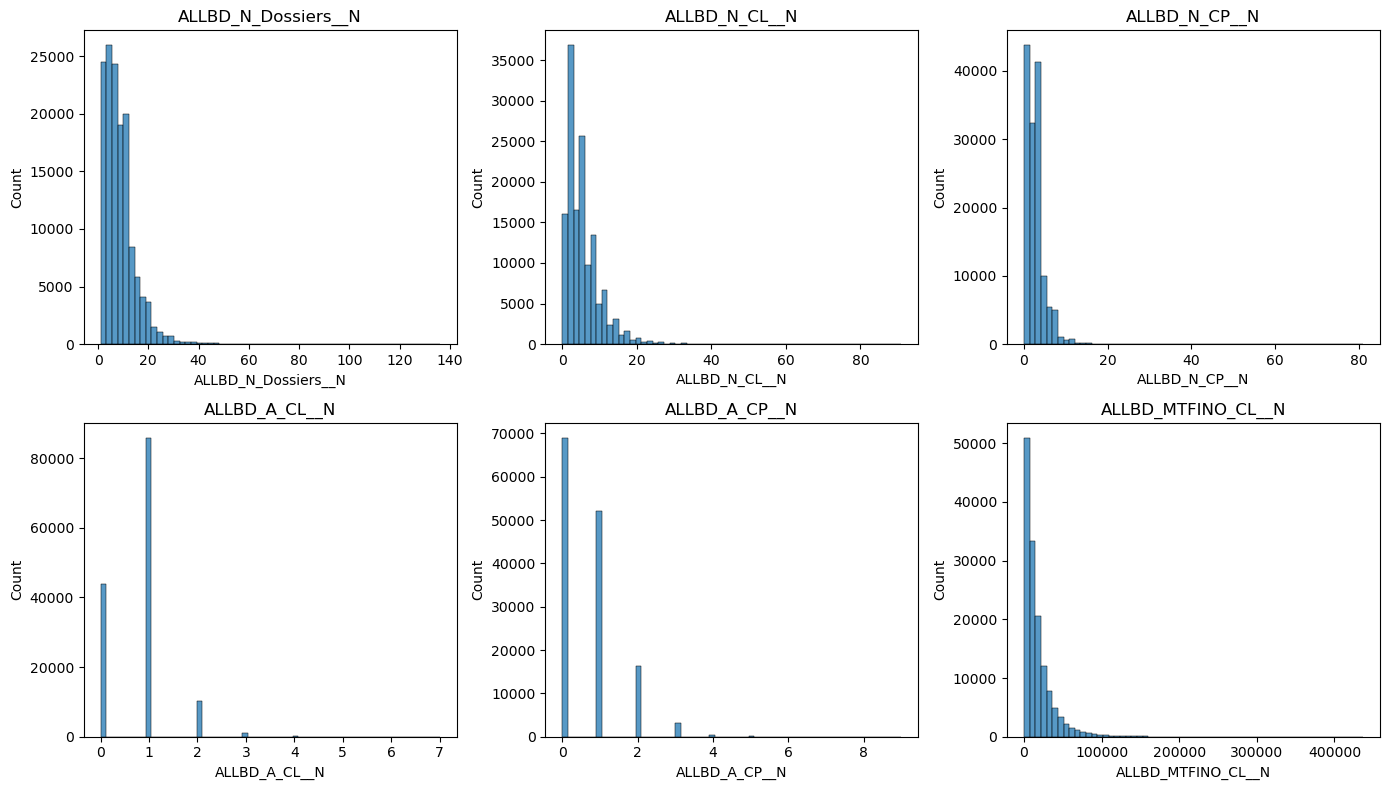

In [66]:
numeric_cols_2 = ['ALLBD_N_Dossiers__N', 'ALLBD_N_CL__N', 'ALLBD_N_CP__N',
                  'ALLBD_A_CL__N', 'ALLBD_A_CP__N', 'ALLBD_MTFINO_CL__N',
                  'ALLBD_MTFINO_CP__N', 'ALLBD_MTFIN_CL__N', 'ALLBD_MTFIN_CP__N',
                  'ALLBD_IDADE_MSA__N', 'ALLBD_IDADE_MIN__N', 'ALLBD_IDADE_MEAN__N',
                  'ALLBD_SUM_NUMFIN_CP__N', 'ALLBD_mean_active_resso__N',
                  'ALLBD_max_active_resso__N', 'ALLBD_mean_duration_CL__N',
                  'ALLBD_mean_lifecycle_CL__N', 'ALLBD_N_events__N',
                  'sdem_SITFAM', 'sdem_HABITAT', 'sdem_age']

cols = numeric_cols_2[:6]  # apenas 6

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.ravel()

for ax, col in zip(axes, cols):
    sns.histplot(FAMA[col].dropna(), bins=60, kde=False, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

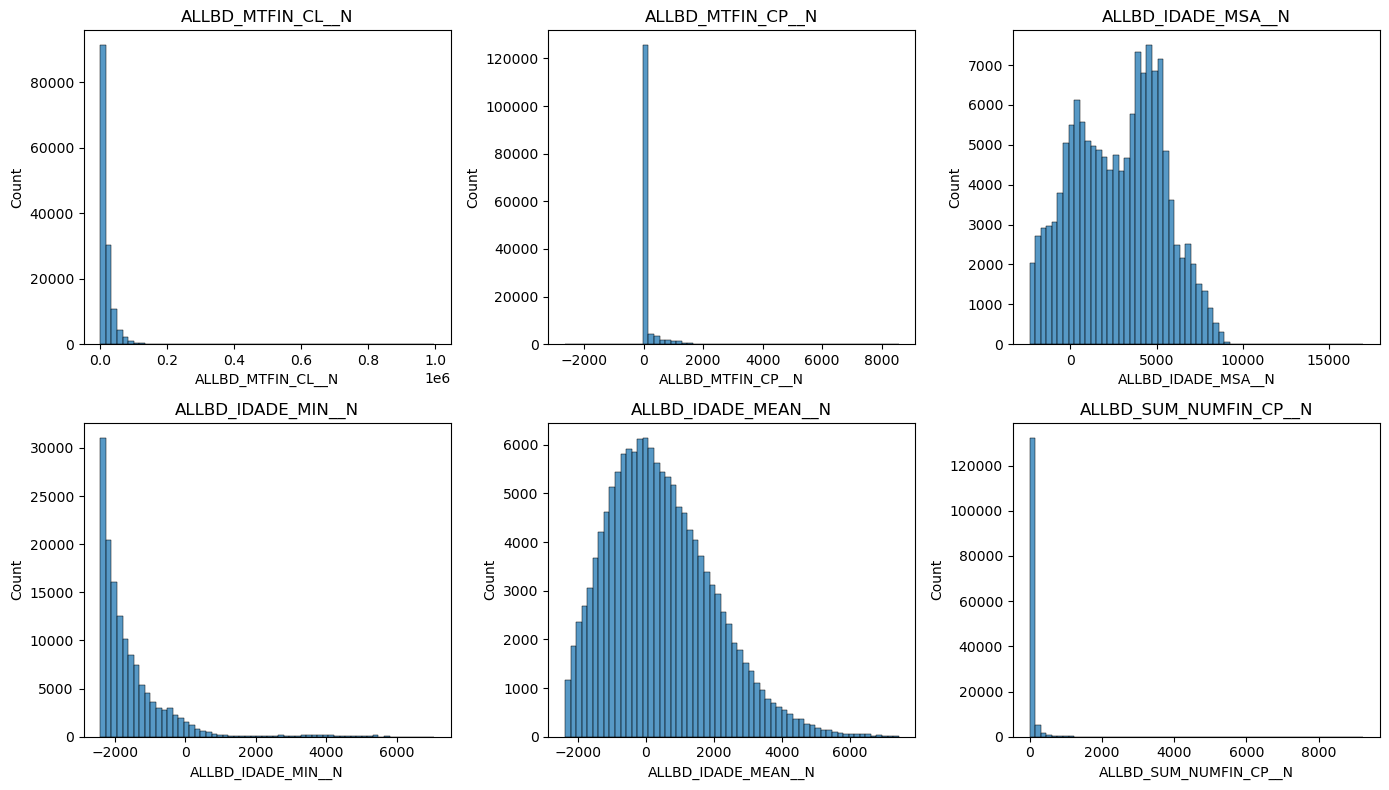

In [67]:
cols = numeric_cols_2[7:13]  # apenas 6

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.ravel()

for ax, col in zip(axes, cols):
    sns.histplot(FAMA[col].dropna(), bins=60, kde=False, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
cols = numeric_cols_2[14:20]  # apenas 6

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.ravel()

for ax, col in zip(axes, cols):
    sns.histplot(FAMA[col].dropna(), bins=60, kde=False, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
corr = FAMA.corr(numeric_only=True)

mask = (corr.abs() < 0.5)

plt.figure(figsize=(12,8))
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            cmap="Blues", 
            center=0)

plt.title("Correlation")
plt.show()

<a class="anchor" id="2.2.4 BDOSS">

## 2.2.4 BDOSS
    
</a>

In [ ]:
pd.set_option('display.max_columns', None)
BDOSS.sort_values(by=['CONTRIB','DOSSIER']).head(18)

In [ ]:
BDOSS['POS'].value_counts()

In [ ]:
BDOSS.info()

In [ ]:
print(BDOSS.columns.tolist())

In [ ]:
N = 200_000 
numeric_cols_3= sample_1.select_dtypes(include="number").columns.tolist()
sample_1 = BDOSS.sample(n=min(N, len(BDOSS)), random_state=42) 
cols = numeric_cols_3[:6] 

fig, axes = plt.subplots(2, 3, figsize=(14, 8)) 
axes = axes.ravel() 
for ax, col in zip(axes, cols): 
    sns.histplot(sample_1[col].dropna(), bins=60, kde=False, ax=ax) 
    ax.set_title(col) 

plt.tight_layout() 
plt.show()

In [ ]:
cols = numeric_cols_3[7:13] 

fig, axes = plt.subplots(2, 3, figsize=(14, 8)) 
axes = axes.ravel() 
for ax, col in zip(axes, cols): 
    sns.histplot(sample_1[col].dropna(), bins=60, kde=False, ax=ax) 
    ax.set_title(col) 

plt.tight_layout() 
plt.show()

In [ ]:
cols = numeric_cols_3[14:20] 

fig, axes = plt.subplots(2, 3, figsize=(14, 8)) 
axes = axes.ravel() 
for ax, col in zip(axes, cols): 
    sns.histplot(sample_1[col].dropna(), bins=60, kde=False, ax=ax) 
    ax.set_title(col) 

plt.tight_layout() 
plt.show()

In [ ]:
corr = BDOSS.corr(numeric_only=True)

mask = (corr.abs() < 0.5)

plt.figure(figsize=(12,8))
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            cmap="Blues", 
            center=0)

plt.title("Correlation")
plt.show()